<a href="https://colab.research.google.com/github/jazibdawre/synapse/blob/master/Task%202/Synapse_Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/theand9/data-viz-challenge.git

Cloning into 'data-viz-challenge'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 54 (delta 1), reused 0 (delta 0), pack-reused 48
Unpacking objects: 100% (54/54), done.


In [ ]:
import pandas as pd

#Original Data
orig_df = pd.read_json('/content/data-viz-challenge/data.json')
data = pd.DataFrame([col for col in orig_df.data])
data = pd.concat([data.drop(['location'], axis=1), data['location'].apply(pd.Series)], axis=1)
#Drop unneeded data
data = data.drop(columns=['marital_status'])

#Remove aged users
data = data[(data['age']!='45-54') & (data['age']!='55+')]
#data = data.drop(columns='age')
data.head()

,category,event_name,gender,age,session_id,device,client_time,amount,latitude,city,state,longitude,zip_code
0,Sports,View Project,M,18-24,69f62d2ae87640f5a2dde2b2e9229fe6,android,1393632004,NaN,40.189788,Lyons,CO,-105.355280,80540
1,Technology,View Project,M,18-24,4459d001feb8438eae5f4ec24abcd992,iOS,1393632022,NaN,33.844371,Alpharetta,GA,-84.474050,30009
3,Technology,View Project,M,18-24,68195e2372bd4022b17220fc21de9138,android,1393632038,NaN,44.624413,Saranac,NY,-73.809266,12981
4,Sports,View Project,F,25-34,9508a8385dc94773baba8aa7d1c2aa75,iOS,1393632051,NaN,36.747083,Lampe,MO,-93.458626,65681
6,Games,View Project,F,35-44,0e00548eb6a54d2f8dbe2bdf6c8efb80,iOS,1393632137,NaN,40.719240,Middle Village,NY,-73.892791,11379


In [ ]:
#Filtering non-compatible categories
data = data[(data['category']=='Environment') | (data['category']=='Sports')]
#data = data.drop(columns='category')
data.shape

(14937, 13)

In [41]:
#Only keep most valuable entries from each user
ids = []
cat = []
evt = []
dup = []

for ind in data.index:
  try:
    loc = ids.index(data['session_id'][ind])
    if evt[loc]=='Fund Project' and data['event_name'][ind]=='Fund Project':
      pass #check for prices here if needed
    elif evt[loc]=='Fund Project':
      dup.append(ind)
    elif data['event_name'][ind]=='Fund Project':
      #Remove view item
      ids.pop(loc)
      cat.pop(loc)
      evt.pop(loc)
      #Add Fund item
      ids.append(data['session_id'][ind])
      cat.append(data['category'][ind])
      evt.append(data['event_name'][ind])
    else:
      dup.append(ind)
  except ValueError:
    ids.append(data['session_id'][ind])
    cat.append(data['category'][ind])
    evt.append(data['event_name'][ind])
  except Exception as e:
    print(e)

data = data.drop(index=dup)
data = data.reset_index(drop=True)
print(data.shape)
data.head()

(11447, 13)


,category,event_name,gender,age,session_id,device,client_time,amount,latitude,city,state,longitude,zip_code
0,Sports,View Project,M,18-24,69f62d2ae87640f5a2dde2b2e9229fe6,android,1393632004,NaN,40.189788,Lyons,CO,-105.355280,80540
1,Sports,View Project,F,25-34,9508a8385dc94773baba8aa7d1c2aa75,iOS,1393632051,NaN,36.747083,Lampe,MO,-93.458626,65681
2,Sports,View Project,F,18-24,a1fdfe0bebed4510a9059bcfb3ba1325,iOS,1393632171,NaN,33.794055,Atlanta,GA,-84.377326,30308
3,Sports,Fund Project,M,18-24,69f62d2ae87640f5a2dde2b2e9229fe6,android,1393632200,31.0,40.189788,Lyons,CO,-105.355280,80540
4,Environment,View Project,F,18-24,ba5a2f05fac84d5a8e4e7132fe1a47b9,iOS,1393632222,NaN,39.863369,Arvada,CO,-105.172429,80007


In [ ]:
data_ind = data.copy()
data_ind.drop_duplicates(subset ="session_id", keep = 'first', inplace = True) 
data_ind.shape

(5224, 13)

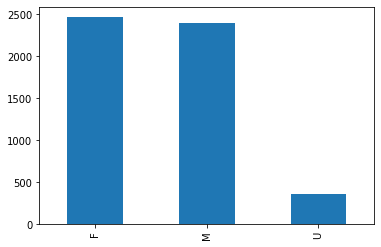

In [ ]:
#Stats by gender
data_ind['gender'].value_counts().plot.bar()

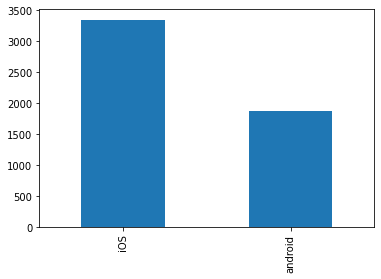

In [35]:
#Stats by mobile device
data_ind['device'].value_counts().plot.bar()

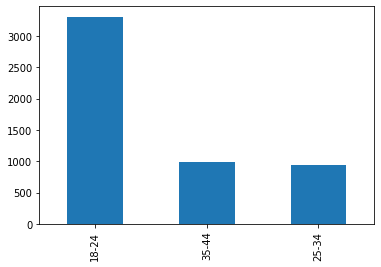

In [ ]:
#Stats by age
data_ind['age'].value_counts().plot.bar()

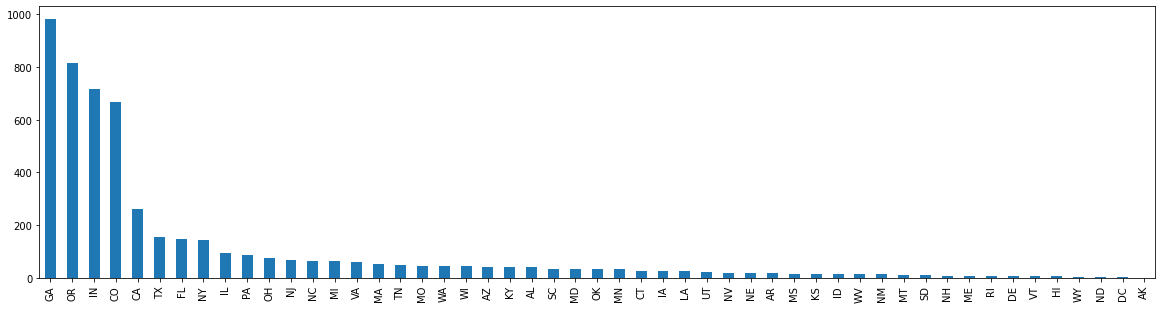

In [ ]:
#Stats by state
data_ind['state'].value_counts().plot.bar(figsize=(20,5))

In [ ]:
#Stats by city
data_ind['city'].value_counts().plot.bar(figsize=(500,200))

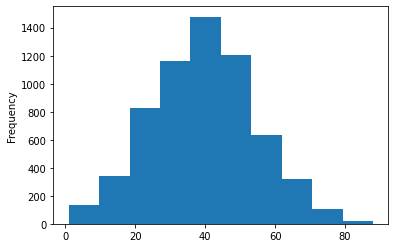

In [ ]:
#Stats by amount
data['amount'].plot.hist()

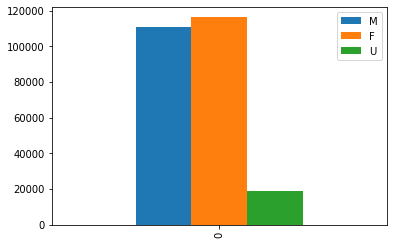

In [39]:
# Amount by Gender
m = 0
f = 0
u = 0

for ind in data.index:
  if data['event_name'][ind]=='Fund Project':
    if data['gender'][ind]=='M':
      m = m + data['amount'][ind]
    if data['gender'][ind]=='F':
      f = f + data['amount'][ind]
    if data['gender'][ind]=='U':
      u = u + data['amount'][ind]

datadct = {'M': [m], 'F': [f], 'U': [u]}
datav = pd.DataFrame(datadct, columns = ['M', 'F', 'U'])
datav.plot.bar()